In [4]:
import pickle
import statistics
import matplotlib.pyplot as plt

In [10]:
with open("../results/20240901T174800_plain.pkl", "rb") as f:
  res = pickle.load(f)

In [11]:
new_dict = {}
for k, v in res.items():
  model = "_".join(k.split('_')[7:])
  nx = k.split('_')[1][2:]
  ny = k.split('_')[2][2:]
  nz = k.split('_')[3][2:]
  num_iter = k.split('_')[5][4:]
  precision = k.split('_')[6][1:]

  model_dict = new_dict.setdefault(model, {})
  precision_dict = model_dict.setdefault(precision, {})
  precision_dict.setdefault((nx, ny, nz, num_iter), []).append(v)

In [12]:
for k, v in new_dict.items():
  for x, y in v.items():
    for i, j in y.items():
      new_dict[k][x][i] = statistics.mean(j)

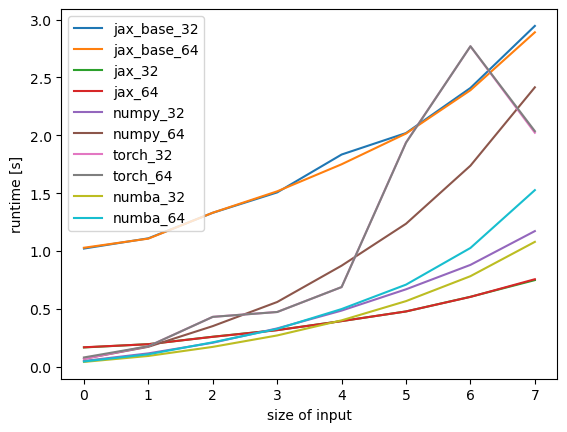

In [13]:
plt.figure()
for k, v in new_dict.items():
    for i,j  in v.items()   :
        plt.plot(j.values(), label=f'{k}_{i}')

plt.legend()

plt.xlabel("size of input")
plt.ylabel("runtime [s]")
plt.show()